In [1]:
# ============================================================================
# CELL 1: Import Required Libraries
# ============================================================================


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from scipy.sparse import csr_matrix
from scipy.sparse.linalg import svds
import warnings
warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)




In [2]:
# ============================================================================
# CELL 2: Upload and Extract Dataset
# ============================================================================
"""
Upload the ml-latest-small.zip file and extract its contents
"""

from google.colab import files
import zipfile
import os

# Upload the zip file
print("Please upload the ml-latest-small.zip file:")
uploaded = files.upload()

# Extract the zip file
zip_filename = list(uploaded.keys())[0]
with zipfile.ZipFile(zip_filename, 'r') as zip_ref:
    zip_ref.extractall('.')

print(f"\n✓ Files extracted successfully!")
print(f"✓ Available files: {os.listdir('ml-latest-small')}")


Please upload the ml-latest-small.zip file:


Saving ml-latest-small.zip to ml-latest-small.zip

✓ Files extracted successfully!
✓ Available files: ['movies.csv', 'tags.csv', 'ratings.csv', 'links.csv', 'README.txt']


In [3]:
# ============================================================================
# CELL 3: Load and Explore the Dataset
# ============================================================================
"""
Load the ratings, movies, and tags datasets and perform initial exploration
"""

# Load datasets
ratings = pd.read_csv('ml-latest-small/ratings.csv')
movies = pd.read_csv('ml-latest-small/movies.csv')
tags = pd.read_csv('ml-latest-small/tags.csv')
links = pd.read_csv('ml-latest-small/links.csv')

print("=" * 80)
print("DATASET OVERVIEW")
print("=" * 80)

# Display basic information
print(f"\n1. Ratings Dataset Shape: {ratings.shape}")
print(f"   - Total Ratings: {len(ratings):,}")
print(f"   - Unique Users: {ratings['userId'].nunique():,}")
print(f"   - Unique Movies: {ratings['movieId'].nunique():,}")

print(f"\n2. Movies Dataset Shape: {movies.shape}")
print(f"   - Total Movies: {len(movies):,}")

print(f"\n3. Tags Dataset Shape: {tags.shape}")
print(f"   - Total Tags: {len(tags):,}")

print("\n" + "=" * 80)
print("RATINGS DATASET - First 5 Rows")
print("=" * 80)
print(ratings.head())

print("\n" + "=" * 80)
print("MOVIES DATASET - First 5 Rows")
print("=" * 80)
print(movies.head())

print("\n" + "=" * 80)
print("DATASET INFO")
print("=" * 80)
print("\nRatings Info:")
print(ratings.info())
print("\nRatings Statistics:")
print(ratings.describe())



DATASET OVERVIEW

1. Ratings Dataset Shape: (100836, 4)
   - Total Ratings: 100,836
   - Unique Users: 610
   - Unique Movies: 9,724

2. Movies Dataset Shape: (9742, 3)
   - Total Movies: 9,742

3. Tags Dataset Shape: (3683, 4)
   - Total Tags: 3,683

RATINGS DATASET - First 5 Rows
   userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931

MOVIES DATASET - First 5 Rows
   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2         

In [4]:
# ============================================================================
# CELL 4: Data Quality Check
# ============================================================================
"""
Check for missing values, duplicates, and data quality issues
"""

print("=" * 80)
print("DATA QUALITY ANALYSIS")
print("=" * 80)

# Check for missing values
print("\n1. Missing Values:")
print(f"   Ratings: {ratings.isnull().sum().sum()}")
print(f"   Movies: {movies.isnull().sum().sum()}")
print(f"   Tags: {tags.isnull().sum().sum()}")

# Check for duplicates
print(f"\n2. Duplicate Rows:")
print(f"   Ratings: {ratings.duplicated().sum()}")
print(f"   Movies: {movies.duplicated().sum()}")

# Check rating distribution
print(f"\n3. Rating Range: {ratings['rating'].min()} to {ratings['rating'].max()}")
print(f"\n4. Rating Value Counts:")
print(ratings['rating'].value_counts().sort_index())

# Check data types
print(f"\n5. Data Types:")
print(ratings.dtypes)

print("\n✓ Data quality check completed!")


DATA QUALITY ANALYSIS

1. Missing Values:
   Ratings: 0
   Movies: 0
   Tags: 0

2. Duplicate Rows:
   Ratings: 0
   Movies: 0

3. Rating Range: 0.5 to 5.0

4. Rating Value Counts:
rating
0.5     1370
1.0     2811
1.5     1791
2.0     7551
2.5     5550
3.0    20047
3.5    13136
4.0    26818
4.5     8551
5.0    13211
Name: count, dtype: int64

5. Data Types:
userId         int64
movieId        int64
rating       float64
timestamp      int64
dtype: object

✓ Data quality check completed!


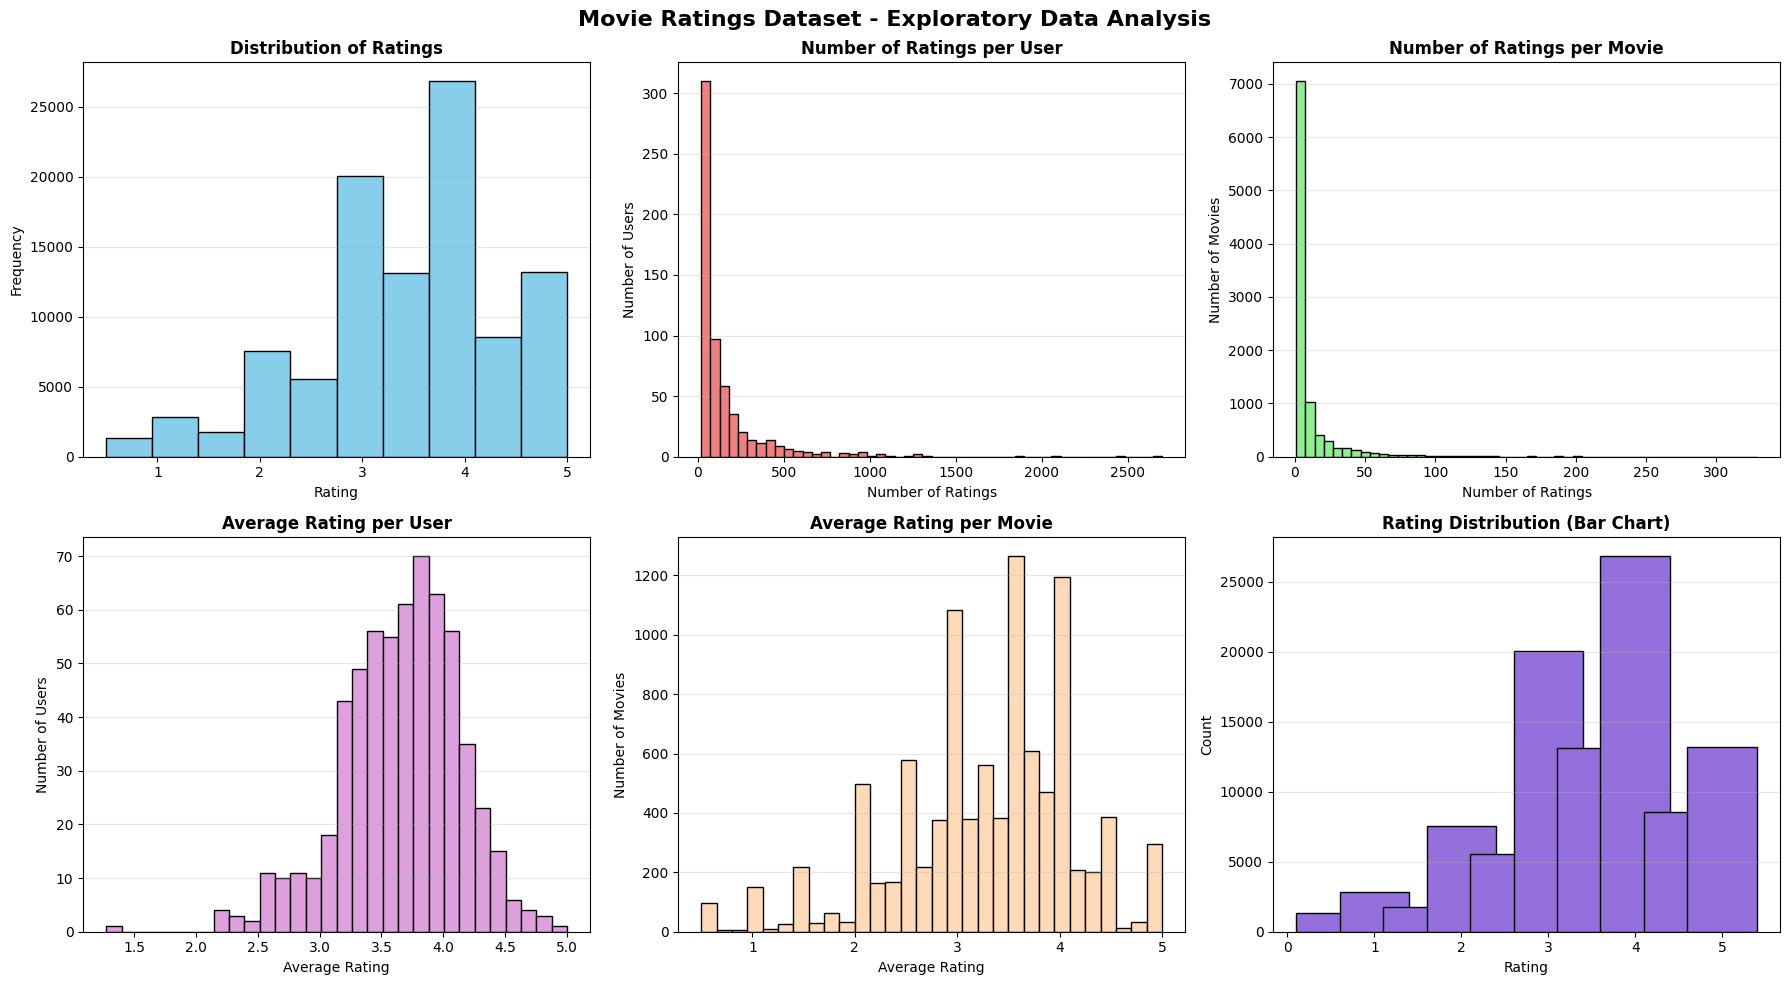

✓ Visualizations completed!


In [5]:
# ============================================================================
# CELL 5: Exploratory Data Analysis - Visualizations
# ============================================================================
"""
Create comprehensive visualizations to understand the data distribution
"""

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Movie Ratings Dataset - Exploratory Data Analysis', fontsize=16, fontweight='bold')

# 1. Rating Distribution
axes[0, 0].hist(ratings['rating'], bins=10, color='skyblue', edgecolor='black')
axes[0, 0].set_title('Distribution of Ratings', fontweight='bold')
axes[0, 0].set_xlabel('Rating')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].grid(axis='y', alpha=0.3)

# 2. Ratings per User
user_rating_counts = ratings.groupby('userId').size()
axes[0, 1].hist(user_rating_counts, bins=50, color='lightcoral', edgecolor='black')
axes[0, 1].set_title('Number of Ratings per User', fontweight='bold')
axes[0, 1].set_xlabel('Number of Ratings')
axes[0, 1].set_ylabel('Number of Users')
axes[0, 1].grid(axis='y', alpha=0.3)

# 3. Ratings per Movie
movie_rating_counts = ratings.groupby('movieId').size()
axes[0, 2].hist(movie_rating_counts, bins=50, color='lightgreen', edgecolor='black')
axes[0, 2].set_title('Number of Ratings per Movie', fontweight='bold')
axes[0, 2].set_xlabel('Number of Ratings')
axes[0, 2].set_ylabel('Number of Movies')
axes[0, 2].grid(axis='y', alpha=0.3)

# 4. Average Rating per User
avg_rating_user = ratings.groupby('userId')['rating'].mean()
axes[1, 0].hist(avg_rating_user, bins=30, color='plum', edgecolor='black')
axes[1, 0].set_title('Average Rating per User', fontweight='bold')
axes[1, 0].set_xlabel('Average Rating')
axes[1, 0].set_ylabel('Number of Users')
axes[1, 0].grid(axis='y', alpha=0.3)

# 5. Average Rating per Movie
avg_rating_movie = ratings.groupby('movieId')['rating'].mean()
axes[1, 1].hist(avg_rating_movie, bins=30, color='peachpuff', edgecolor='black')
axes[1, 1].set_title('Average Rating per Movie', fontweight='bold')
axes[1, 1].set_xlabel('Average Rating')
axes[1, 1].set_ylabel('Number of Movies')
axes[1, 1].grid(axis='y', alpha=0.3)

# 6. Rating Counts Bar Chart
rating_counts = ratings['rating'].value_counts().sort_index()
axes[1, 2].bar(rating_counts.index, rating_counts.values, color='mediumpurple', edgecolor='black')
axes[1, 2].set_title('Rating Distribution (Bar Chart)', fontweight='bold')
axes[1, 2].set_xlabel('Rating')
axes[1, 2].set_ylabel('Count')
axes[1, 2].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("✓ Visualizations completed!")


In [6]:
# ============================================================================
# CELL 6: Statistical Summary
# ============================================================================
"""
Generate detailed statistical summaries of the dataset
"""

print("=" * 80)
print("DETAILED STATISTICAL SUMMARY")
print("=" * 80)

# User statistics
print("\n1. USER STATISTICS:")
print(f"   - Total unique users: {ratings['userId'].nunique():,}")
print(f"   - Min ratings by a user: {user_rating_counts.min()}")
print(f"   - Max ratings by a user: {user_rating_counts.max()}")
print(f"   - Average ratings per user: {user_rating_counts.mean():.2f}")
print(f"   - Median ratings per user: {user_rating_counts.median():.2f}")

# Movie statistics
print("\n2. MOVIE STATISTICS:")
print(f"   - Total unique movies: {ratings['movieId'].nunique():,}")
print(f"   - Min ratings for a movie: {movie_rating_counts.min()}")
print(f"   - Max ratings for a movie: {movie_rating_counts.max()}")
print(f"   - Average ratings per movie: {movie_rating_counts.mean():.2f}")
print(f"   - Median ratings per movie: {movie_rating_counts.median():.2f}")

# Rating statistics
print("\n3. RATING STATISTICS:")
print(f"   - Mean rating: {ratings['rating'].mean():.2f}")
print(f"   - Median rating: {ratings['rating'].median():.2f}")
print(f"   - Std deviation: {ratings['rating'].std():.2f}")
print(f"   - Most common rating: {ratings['rating'].mode()[0]}")

# Sparsity calculation
total_possible_ratings = ratings['userId'].nunique() * ratings['movieId'].nunique()
sparsity = (1 - len(ratings) / total_possible_ratings) * 100
print(f"\n4. MATRIX SPARSITY: {sparsity:.2f}%")
print(f"   - Existing ratings: {len(ratings):,}")
print(f"   - Possible ratings: {total_possible_ratings:,}")


DETAILED STATISTICAL SUMMARY

1. USER STATISTICS:
   - Total unique users: 610
   - Min ratings by a user: 20
   - Max ratings by a user: 2698
   - Average ratings per user: 165.30
   - Median ratings per user: 70.50

2. MOVIE STATISTICS:
   - Total unique movies: 9,724
   - Min ratings for a movie: 1
   - Max ratings for a movie: 329
   - Average ratings per movie: 10.37
   - Median ratings per movie: 3.00

3. RATING STATISTICS:
   - Mean rating: 3.50
   - Median rating: 3.50
   - Std deviation: 1.04
   - Most common rating: 4.0

4. MATRIX SPARSITY: 98.30%
   - Existing ratings: 100,836
   - Possible ratings: 5,931,640


In [7]:
# ============================================================================
# CELL 7: Data Preprocessing - Feature Engineering
# ============================================================================
"""
Create additional features for improving model performance
"""

print("=" * 80)
print("FEATURE ENGINEERING")
print("=" * 80)

# Merge ratings with movies to get movie titles
ratings_with_movies = ratings.merge(movies, on='movieId', how='left')

# Create user-based features
user_features = ratings.groupby('userId').agg({
    'rating': ['count', 'mean', 'std', 'min', 'max']
}).reset_index()
user_features.columns = ['userId', 'user_rating_count', 'user_avg_rating',
                         'user_rating_std', 'user_min_rating', 'user_max_rating']
user_features['user_rating_std'] = user_features['user_rating_std'].fillna(0)

# Create movie-based features
movie_features = ratings.groupby('movieId').agg({
    'rating': ['count', 'mean', 'std', 'min', 'max']
}).reset_index()
movie_features.columns = ['movieId', 'movie_rating_count', 'movie_avg_rating',
                          'movie_rating_std', 'movie_min_rating', 'movie_max_rating']
movie_features['movie_rating_std'] = movie_features['movie_rating_std'].fillna(0)

# Merge features back to ratings
ratings_enhanced = ratings.merge(user_features, on='userId', how='left')
ratings_enhanced = ratings_enhanced.merge(movie_features, on='movieId', how='left')

print(f"\n✓ Enhanced dataset shape: {ratings_enhanced.shape}")
print(f"\n✓ New features created:")
print(f"   - User features: {list(user_features.columns[1:])}")
print(f"   - Movie features: {list(movie_features.columns[1:])}")

print("\n" + "=" * 80)
print("ENHANCED DATASET - First 5 Rows")
print("=" * 80)
print(ratings_enhanced.head())


FEATURE ENGINEERING

✓ Enhanced dataset shape: (100836, 14)

✓ New features created:
   - User features: ['user_rating_count', 'user_avg_rating', 'user_rating_std', 'user_min_rating', 'user_max_rating']
   - Movie features: ['movie_rating_count', 'movie_avg_rating', 'movie_rating_std', 'movie_min_rating', 'movie_max_rating']

ENHANCED DATASET - First 5 Rows
   userId  movieId  rating  timestamp  user_rating_count  user_avg_rating  \
0       1        1     4.0  964982703                232         4.366379   
1       1        3     4.0  964981247                232         4.366379   
2       1        6     4.0  964982224                232         4.366379   
3       1       47     5.0  964983815                232         4.366379   
4       1       50     5.0  964982931                232         4.366379   

   user_rating_std  user_min_rating  user_max_rating  movie_rating_count  \
0         0.800048              1.0              5.0                 215   
1         0.800048       

In [8]:
# ============================================================================
# CELL 8: Train-Test Split
# ============================================================================
"""
Split the data into training and testing sets (80-20 split)
"""

print("=" * 80)
print("TRAIN-TEST SPLIT")
print("=" * 80)

# Split data into train and test sets
train_data, test_data = train_test_split(ratings_enhanced, test_size=0.2, random_state=42)

print(f"\n✓ Training set size: {len(train_data):,} ({len(train_data)/len(ratings_enhanced)*100:.1f}%)")
print(f"✓ Testing set size: {len(test_data):,} ({len(test_data)/len(ratings_enhanced)*100:.1f}%)")

print(f"\n✓ Training set shape: {train_data.shape}")
print(f"✓ Testing set shape: {test_data.shape}")

# Check data distribution in train and test
print(f"\n✓ Training set rating distribution:")
print(train_data['rating'].value_counts().sort_index())

print(f"\n✓ Testing set rating distribution:")
print(test_data['rating'].value_counts().sort_index())


TRAIN-TEST SPLIT

✓ Training set size: 80,668 (80.0%)
✓ Testing set size: 20,168 (20.0%)

✓ Training set shape: (80668, 14)
✓ Testing set shape: (20168, 14)

✓ Training set rating distribution:
rating
0.5     1081
1.0     2255
1.5     1399
2.0     6018
2.5     4470
3.0    16068
3.5    10488
4.0    21507
4.5     6819
5.0    10563
Name: count, dtype: int64

✓ Testing set rating distribution:
rating
0.5     289
1.0     556
1.5     392
2.0    1533
2.5    1080
3.0    3979
3.5    2648
4.0    5311
4.5    1732
5.0    2648
Name: count, dtype: int64


In [9]:
# ============================================================================
# CELL 9: Model 1 - Memory-Based Collaborative Filtering (User-Based)
# ============================================================================
"""
Implement User-Based Collaborative Filtering using cosine similarity
"""

from sklearn.metrics.pairwise import cosine_similarity

print("=" * 80)
print("MODEL 1: USER-BASED COLLABORATIVE FILTERING")
print("=" * 80)

# Create user-item matrix from training data
user_item_matrix = train_data.pivot_table(index='userId',
                                           columns='movieId',
                                           values='rating')

# Fill NaN with 0 (no rating)
user_item_matrix_filled = user_item_matrix.fillna(0)

print(f"\n✓ User-Item Matrix Shape: {user_item_matrix_filled.shape}")
print(f"✓ Matrix Size: {user_item_matrix_filled.shape[0]} users × {user_item_matrix_filled.shape[1]} movies")

# Calculate user similarity matrix using cosine similarity
print("\n⏳ Computing user similarity matrix...")
user_similarity = cosine_similarity(user_item_matrix_filled)
user_similarity_df = pd.DataFrame(user_similarity,
                                  index=user_item_matrix.index,
                                  columns=user_item_matrix.index)

print(f"✓ User Similarity Matrix Shape: {user_similarity_df.shape}")

# Function to predict rating for a user-movie pair
def predict_user_based(user_id, movie_id, k=30):
    """
    Predict rating using k-nearest neighbors (user-based CF)
    k: number of similar users to consider
    """
    try:
        # Check if user and movie exist in training data
        if user_id not in user_similarity_df.index:
            return user_features[user_features['userId'] == user_id]['user_avg_rating'].values[0] if len(user_features[user_features['userId'] == user_id]) > 0 else ratings['rating'].mean()

        if movie_id not in user_item_matrix.columns:
            return movie_features[movie_features['movieId'] == movie_id]['movie_avg_rating'].values[0] if len(movie_features[movie_features['movieId'] == movie_id]) > 0 else ratings['rating'].mean()

        # Get similar users
        similar_users = user_similarity_df[user_id].sort_values(ascending=False)[1:k+1]

        # Get ratings from similar users for this movie
        similar_user_ratings = user_item_matrix.loc[similar_users.index, movie_id]

        # Remove NaN ratings
        valid_ratings = similar_user_ratings.dropna()
        valid_similarities = similar_users[valid_ratings.index]

        if len(valid_ratings) == 0:
            return user_features[user_features['userId'] == user_id]['user_avg_rating'].values[0]

        # Weighted average of ratings
        weighted_sum = (valid_ratings * valid_similarities).sum()
        similarity_sum = valid_similarities.sum()

        if similarity_sum == 0:
            return user_features[user_features['userId'] == user_id]['user_avg_rating'].values[0]

        predicted_rating = weighted_sum / similarity_sum

        # Clip to valid range
        return np.clip(predicted_rating, 0.5, 5.0)

    except Exception as e:
        # Fallback to user average
        return user_features[user_features['userId'] == user_id]['user_avg_rating'].values[0]

# Make predictions on test set (sample for speed)
print("\n⏳ Making predictions on test set...")
test_sample = test_data.head(1000).copy()  # Use sample for faster computation

predictions_cf = []
for _, row in test_sample.iterrows():
    pred = predict_user_based(row['userId'], row['movieId'])
    predictions_cf.append(pred)

test_sample['predicted_rating_cf'] = predictions_cf

# Calculate metrics
rmse_cf = np.sqrt(mean_squared_error(test_sample['rating'], test_sample['predicted_rating_cf']))
mae_cf = mean_absolute_error(test_sample['rating'], test_sample['predicted_rating_cf'])
r2_cf = r2_score(test_sample['rating'], test_sample['predicted_rating_cf'])

print(f"\n{'='*80}")
print("USER-BASED COLLABORATIVE FILTERING RESULTS")
print(f"{'='*80}")
print(f"✓ RMSE: {rmse_cf:.4f}")
print(f"✓ MAE: {mae_cf:.4f}")
print(f"✓ R² Score: {r2_cf:.4f}")
print(f"\nSample Predictions:")
print(test_sample[['userId', 'movieId', 'rating', 'predicted_rating_cf']].head(10))


MODEL 1: USER-BASED COLLABORATIVE FILTERING

✓ User-Item Matrix Shape: (610, 8983)
✓ Matrix Size: 610 users × 8983 movies

⏳ Computing user similarity matrix...
✓ User Similarity Matrix Shape: (610, 610)

⏳ Making predictions on test set...

USER-BASED COLLABORATIVE FILTERING RESULTS
✓ RMSE: 0.9423
✓ MAE: 0.7099
✓ R² Score: 0.1858

Sample Predictions:
       userId  movieId  rating  predicted_rating_cf
67037     432    77866     4.5             3.646154
42175     288      474     3.0             3.721637
93850     599     4351     3.0             2.940412
6187       42     2987     4.0             3.687280
12229      75     1610     4.0             3.360561
7433       51      177     4.0             3.000000
53802     354    51662     3.5             4.120733
65098     416      750     4.5             4.307582
68041     438     6503     0.5             2.683758
11854      73     8641     3.5             3.955230


In [10]:
# ============================================================================
# CELL 10: Model 2 - Matrix Factorization (SVD)
# ============================================================================
"""
Implement Matrix Factorization using Singular Value Decomposition (SVD)
"""

print("=" * 80)
print("MODEL 2: MATRIX FACTORIZATION (SVD)")
print("=" * 80)

# Create user-item matrix (sparse format for efficiency)
print("\n⏳ Creating user-item matrix...")
user_item_matrix_sparse = csr_matrix(user_item_matrix_filled.values)

# Perform SVD with k latent factors
k = 50  # Number of latent factors
print(f"\n⏳ Performing SVD with {k} latent factors...")

U, sigma, Vt = svds(user_item_matrix_sparse, k=k)

# Convert sigma to diagonal matrix
sigma = np.diag(sigma)

# Reconstruct the rating matrix
print("⏳ Reconstructing rating matrix...")
predicted_ratings_svd = np.dot(np.dot(U, sigma), Vt)

# Convert to DataFrame for easier access
predicted_ratings_df = pd.DataFrame(
    predicted_ratings_svd,
    index=user_item_matrix.index,
    columns=user_item_matrix.columns
)

print(f"\n✓ SVD Decomposition completed!")
print(f"✓ U matrix shape: {U.shape}")
print(f"✓ Sigma matrix shape: {sigma.shape}")
print(f"✓ Vt matrix shape: {Vt.shape}")

# Function to predict using SVD
def predict_svd(user_id, movie_id):
    """Predict rating using SVD matrix factorization"""
    try:
        if user_id in predicted_ratings_df.index and movie_id in predicted_ratings_df.columns:
            prediction = predicted_ratings_df.loc[user_id, movie_id]
            return np.clip(prediction, 0.5, 5.0)
        elif user_id in user_features['userId'].values:
            return user_features[user_features['userId'] == user_id]['user_avg_rating'].values[0]
        else:
            return ratings['rating'].mean()
    except:
        return ratings['rating'].mean()

# Make predictions on test set
print("\n⏳ Making predictions on test set...")
test_sample_svd = test_data.head(1000).copy()

predictions_svd = []
for _, row in test_sample_svd.iterrows():
    pred = predict_svd(row['userId'], row['movieId'])
    predictions_svd.append(pred)

test_sample_svd['predicted_rating_svd'] = predictions_svd

# Calculate metrics
rmse_svd = np.sqrt(mean_squared_error(test_sample_svd['rating'], test_sample_svd['predicted_rating_svd']))
mae_svd = mean_absolute_error(test_sample_svd['rating'], test_sample_svd['predicted_rating_svd'])
r2_svd = r2_score(test_sample_svd['rating'], test_sample_svd['predicted_rating_svd'])

print(f"\n{'='*80}")
print("MATRIX FACTORIZATION (SVD) RESULTS")
print(f"{'='*80}")
print(f"✓ RMSE: {rmse_svd:.4f}")
print(f"✓ MAE: {mae_svd:.4f}")
print(f"✓ R² Score: {r2_svd:.4f}")
print(f"\nSample Predictions:")
print(test_sample_svd[['userId', 'movieId', 'rating', 'predicted_rating_svd']].head(10))


MODEL 2: MATRIX FACTORIZATION (SVD)

⏳ Creating user-item matrix...

⏳ Performing SVD with 50 latent factors...
⏳ Reconstructing rating matrix...

✓ SVD Decomposition completed!
✓ U matrix shape: (610, 50)
✓ Sigma matrix shape: (50, 50)
✓ Vt matrix shape: (50, 8983)

⏳ Making predictions on test set...

MATRIX FACTORIZATION (SVD) RESULTS
✓ RMSE: 2.8584
✓ MAE: 2.6325
✓ R² Score: -6.4913

Sample Predictions:
       userId  movieId  rating  predicted_rating_svd
67037     432    77866     4.5              0.500000
42175     288      474     3.0              0.500000
93850     599     4351     3.0              0.500000
6187       42     2987     4.0              1.150565
12229      75     1610     4.0              0.500000
7433       51      177     4.0              0.500000
53802     354    51662     3.5              1.419984
65098     416      750     4.5              0.690686
68041     438     6503     0.5              0.874047
11854      73     8641     3.5              0.655325


In [11]:
# ============================================================================
# CELL 11: Model 3 - Regression Models (Linear & Random Forest)
# ============================================================================
"""
Build and train regression models using engineered features
"""

print("=" * 80)
print("MODEL 3: REGRESSION MODELS")
print("=" * 80)

# Prepare features for regression
feature_columns = ['user_rating_count', 'user_avg_rating', 'user_rating_std',
                   'movie_rating_count', 'movie_avg_rating', 'movie_rating_std']

X_train = train_data[feature_columns]
y_train = train_data['rating']

X_test = test_data[feature_columns]
y_test = test_data['rating']

print(f"\n✓ Training features shape: {X_train.shape}")
print(f"✓ Testing features shape: {X_test.shape}")

# Model 3a: Linear Regression
print("\n⏳ Training Linear Regression model...")
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)
y_pred_lr = np.clip(y_pred_lr, 0.5, 5.0)  # Clip predictions to valid range

rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f"\n{'='*80}")
print("LINEAR REGRESSION RESULTS")
print(f"{'='*80}")
print(f"✓ RMSE: {rmse_lr:.4f}")
print(f"✓ MAE: {mae_lr:.4f}")
print(f"✓ R² Score: {r2_lr:.4f}")

# Feature importance for Linear Regression
print(f"\nFeature Coefficients:")
for feature, coef in zip(feature_columns, lr_model.coef_):
    print(f"  {feature}: {coef:.4f}")

# Model 3b: Ridge Regression
print("\n⏳ Training Ridge Regression model...")
ridge_model = Ridge(alpha=1.0, random_state=42)
ridge_model.fit(X_train, y_train)

y_pred_ridge = ridge_model.predict(X_test)
y_pred_ridge = np.clip(y_pred_ridge, 0.5, 5.0)

rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f"\n{'='*80}")
print("RIDGE REGRESSION RESULTS")
print(f"{'='*80}")
print(f"✓ RMSE: {rmse_ridge:.4f}")
print(f"✓ MAE: {mae_ridge:.4f}")
print(f"✓ R² Score: {r2_ridge:.4f}")

# Model 3c: Random Forest Regressor
print("\n⏳ Training Random Forest Regressor...")
rf_model = RandomForestRegressor(n_estimators=100, max_depth=10,
                                 random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
y_pred_rf = np.clip(y_pred_rf, 0.5, 5.0)

rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"\n{'='*80}")
print("RANDOM FOREST REGRESSOR RESULTS")
print(f"{'='*80}")
print(f"✓ RMSE: {rmse_rf:.4f}")
print(f"✓ MAE: {mae_rf:.4f}")
print(f"✓ R² Score: {r2_rf:.4f}")

# Feature importance for Random Forest
print(f"\nFeature Importances:")
feature_importance = pd.DataFrame({
    'feature': feature_columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)
print(feature_importance)


MODEL 3: REGRESSION MODELS

✓ Training features shape: (80668, 6)
✓ Testing features shape: (20168, 6)

⏳ Training Linear Regression model...

LINEAR REGRESSION RESULTS
✓ RMSE: 0.8109
✓ MAE: 0.6159
✓ R² Score: 0.4022

Feature Coefficients:
  user_rating_count: 0.0001
  user_avg_rating: 0.8006
  user_rating_std: 0.0108
  movie_rating_count: -0.0002
  movie_avg_rating: 0.8703
  movie_rating_std: -0.0172

⏳ Training Ridge Regression model...

RIDGE REGRESSION RESULTS
✓ RMSE: 0.8109
✓ MAE: 0.6159
✓ R² Score: 0.4022

⏳ Training Random Forest Regressor...

RANDOM FOREST REGRESSOR RESULTS
✓ RMSE: 0.7944
✓ MAE: 0.5934
✓ R² Score: 0.4264

Feature Importances:
              feature  importance
4    movie_avg_rating    0.586621
1     user_avg_rating    0.286510
5    movie_rating_std    0.046214
2     user_rating_std    0.041635
3  movie_rating_count    0.019923
0   user_rating_count    0.019097


MODEL COMPARISON

            Model     RMSE      MAE  R² Score
    User-Based CF 0.942317 0.709912  0.185834
              SVD 2.858365 2.632497 -6.491253
Linear Regression 0.810931 0.615884  0.402196
 Ridge Regression 0.810931 0.615884  0.402196
    Random Forest 0.794355 0.593428  0.426386

🏆 Best Model (Lowest RMSE): Random Forest
   RMSE: 0.7944
   MAE: 0.5934
   R²: 0.4264


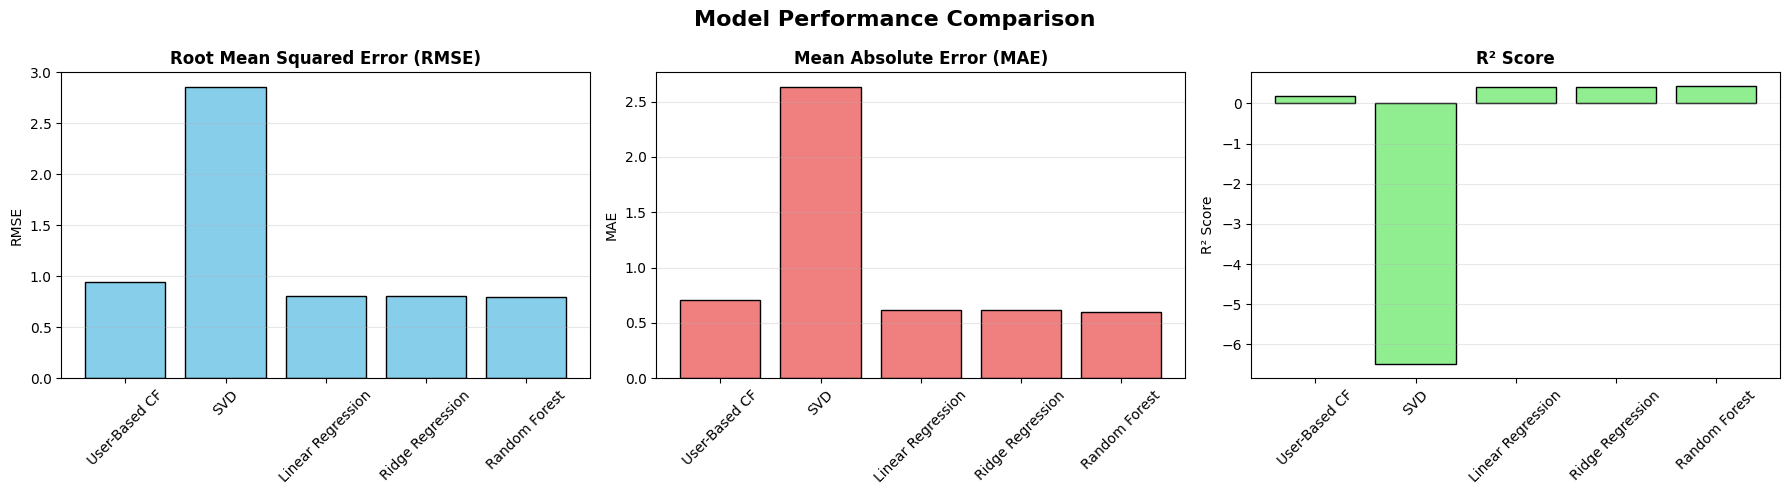

In [12]:
# ============================================================================
# CELL 12: Model Comparison and Visualization
# ============================================================================
"""
Compare all models and visualize their performance
"""

print("=" * 80)
print("MODEL COMPARISON")
print("=" * 80)

# Create comparison dataframe
results = pd.DataFrame({
    'Model': ['User-Based CF', 'SVD', 'Linear Regression', 'Ridge Regression', 'Random Forest'],
    'RMSE': [rmse_cf, rmse_svd, rmse_lr, rmse_ridge, rmse_rf],
    'MAE': [mae_cf, mae_svd, mae_lr, mae_ridge, mae_rf],
    'R² Score': [r2_cf, r2_svd, r2_lr, r2_ridge, r2_rf]
})

print("\n" + results.to_string(index=False))

# Find best model
best_model_idx = results['RMSE'].idxmin()
best_model_name = results.loc[best_model_idx, 'Model']
print(f"\n🏆 Best Model (Lowest RMSE): {best_model_name}")
print(f"   RMSE: {results.loc[best_model_idx, 'RMSE']:.4f}")
print(f"   MAE: {results.loc[best_model_idx, 'MAE']:.4f}")
print(f"   R²: {results.loc[best_model_idx, 'R² Score']:.4f}")

# Visualization
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Model Performance Comparison', fontsize=16, fontweight='bold')

# RMSE Comparison
axes[0].bar(results['Model'], results['RMSE'], color='skyblue', edgecolor='black')
axes[0].set_title('Root Mean Squared Error (RMSE)', fontweight='bold')
axes[0].set_ylabel('RMSE')
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(axis='y', alpha=0.3)

# MAE Comparison
axes[1].bar(results['Model'], results['MAE'], color='lightcoral', edgecolor='black')
axes[1].set_title('Mean Absolute Error (MAE)', fontweight='bold')
axes[1].set_ylabel('MAE')
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(axis='y', alpha=0.3)

# R² Score Comparison
axes[2].bar(results['Model'], results['R² Score'], color='lightgreen', edgecolor='black')
axes[2].set_title('R² Score', fontweight='bold')
axes[2].set_ylabel('R² Score')
axes[2].tick_params(axis='x', rotation=45)
axes[2].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()


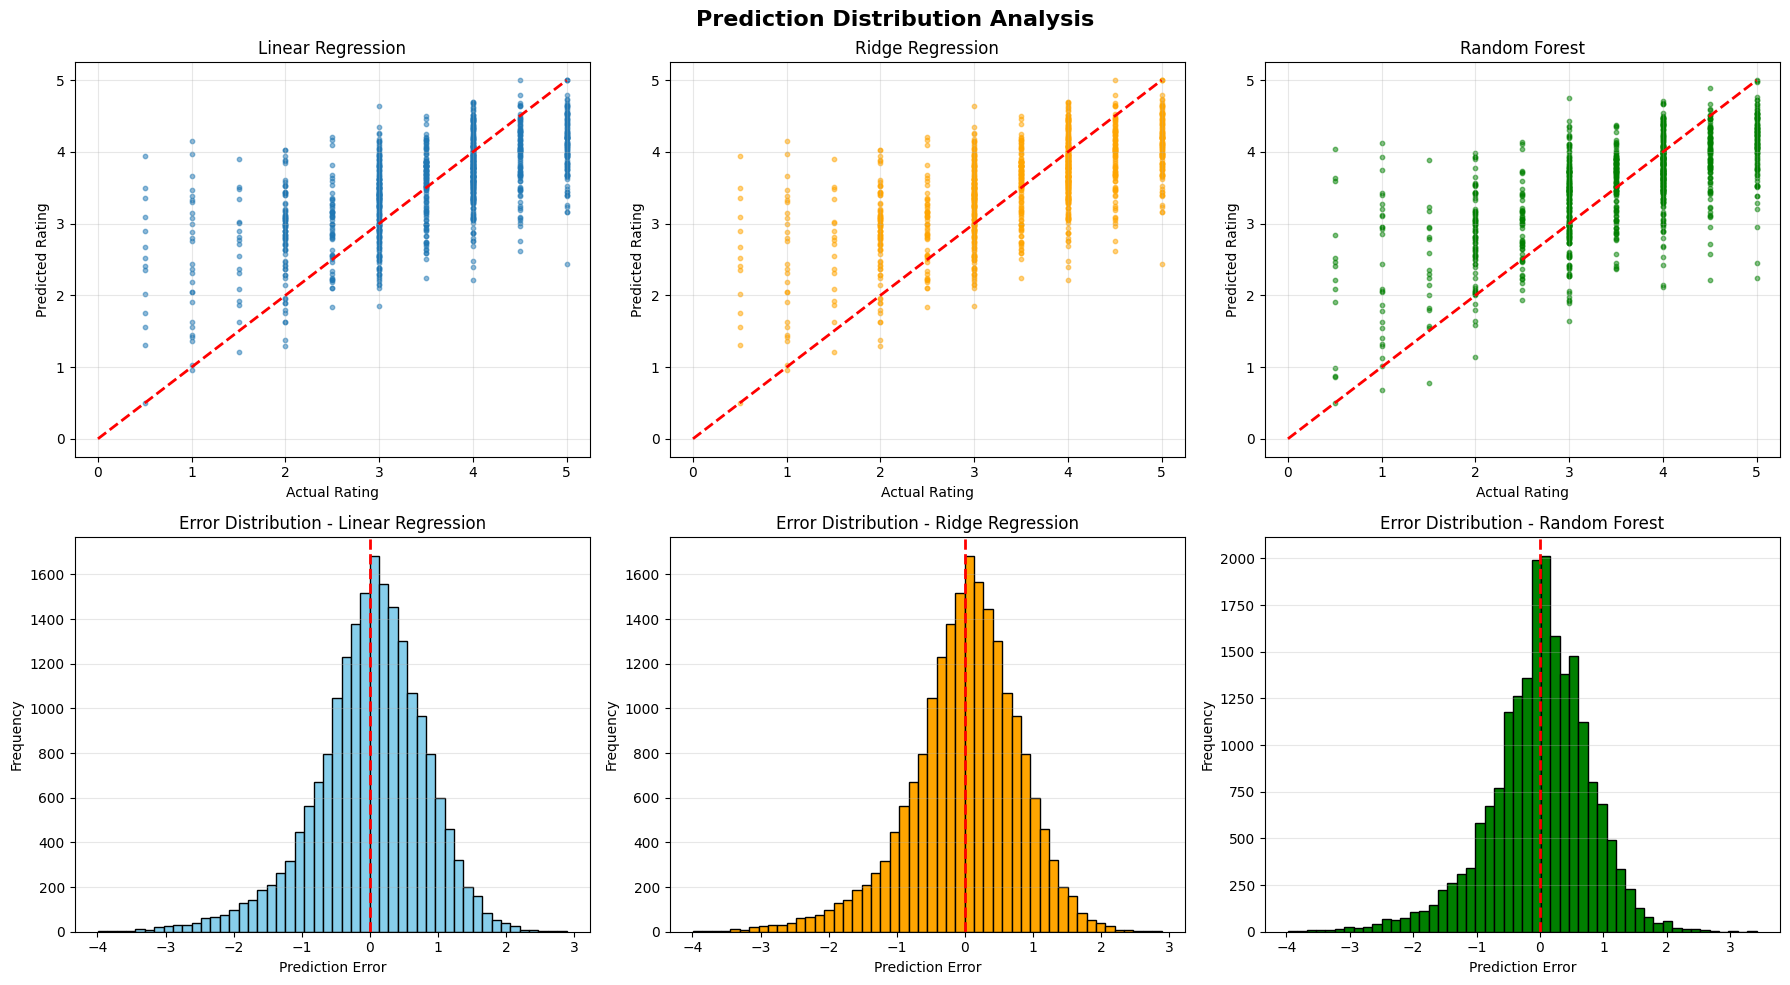

✓ Prediction distribution analysis completed!


In [13]:
# ============================================================================
# CELL 13: Prediction Distribution Analysis
# ============================================================================
"""
Analyze the distribution of predictions vs actual ratings
"""

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Prediction Distribution Analysis', fontsize=16, fontweight='bold')

# Linear Regression
axes[0, 0].scatter(y_test[:1000], y_pred_lr[:1000], alpha=0.5, s=10)
axes[0, 0].plot([0, 5], [0, 5], 'r--', lw=2)
axes[0, 0].set_xlabel('Actual Rating')
axes[0, 0].set_ylabel('Predicted Rating')
axes[0, 0].set_title('Linear Regression')
axes[0, 0].grid(alpha=0.3)

# Ridge Regression
axes[0, 1].scatter(y_test[:1000], y_pred_ridge[:1000], alpha=0.5, s=10, color='orange')
axes[0, 1].plot([0, 5], [0, 5], 'r--', lw=2)
axes[0, 1].set_xlabel('Actual Rating')
axes[0, 1].set_ylabel('Predicted Rating')
axes[0, 1].set_title('Ridge Regression')
axes[0, 1].grid(alpha=0.3)

# Random Forest
axes[0, 2].scatter(y_test[:1000], y_pred_rf[:1000], alpha=0.5, s=10, color='green')
axes[0, 2].plot([0, 5], [0, 5], 'r--', lw=2)
axes[0, 2].set_xlabel('Actual Rating')
axes[0, 2].set_ylabel('Predicted Rating')
axes[0, 2].set_title('Random Forest')
axes[0, 2].grid(alpha=0.3)

# Error distribution - Linear Regression
errors_lr = y_test - y_pred_lr
axes[1, 0].hist(errors_lr, bins=50, color='skyblue', edgecolor='black')
axes[1, 0].set_xlabel('Prediction Error')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_title('Error Distribution - Linear Regression')
axes[1, 0].axvline(x=0, color='r', linestyle='--', lw=2)
axes[1, 0].grid(axis='y', alpha=0.3)

# Error distribution - Ridge Regression
errors_ridge = y_test - y_pred_ridge
axes[1, 1].hist(errors_ridge, bins=50, color='orange', edgecolor='black')
axes[1, 1].set_xlabel('Prediction Error')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].set_title('Error Distribution - Ridge Regression')
axes[1, 1].axvline(x=0, color='r', linestyle='--', lw=2)
axes[1, 1].grid(axis='y', alpha=0.3)

# Error distribution - Random Forest
errors_rf = y_test - y_pred_rf
axes[1, 2].hist(errors_rf, bins=50, color='green', edgecolor='black')
axes[1, 2].set_xlabel('Prediction Error')
axes[1, 2].set_ylabel('Frequency')
axes[1, 2].set_title('Error Distribution - Random Forest')
axes[1, 2].axvline(x=0, color='r', linestyle='--', lw=2)
axes[1, 2].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("✓ Prediction distribution analysis completed!")


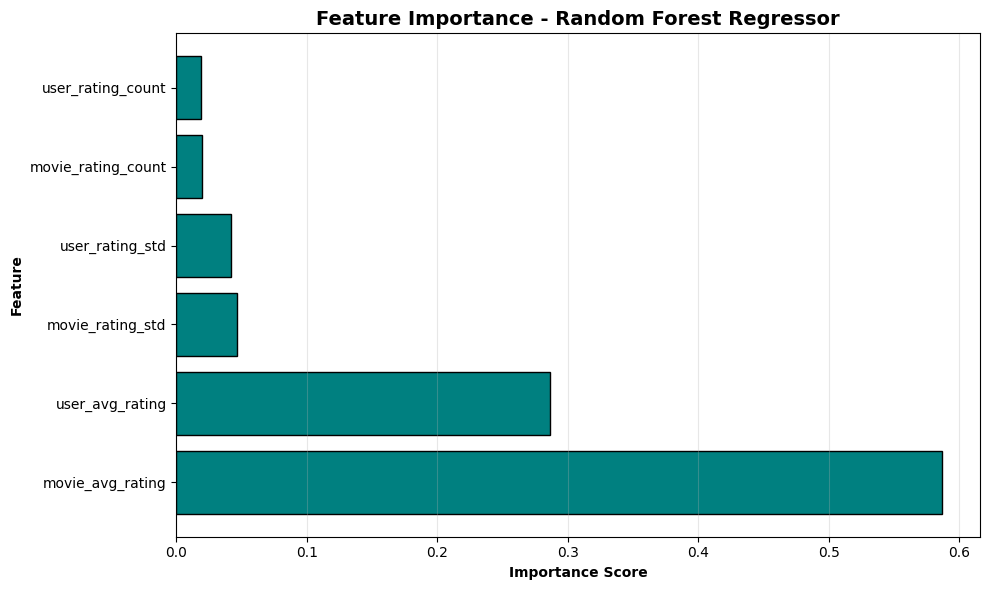

✓ Feature importance visualization completed!


In [14]:
# ============================================================================
# CELL 14: Feature Importance Visualization
# ============================================================================
"""
Visualize feature importance from Random Forest model
"""

plt.figure(figsize=(10, 6))
plt.barh(feature_importance['feature'], feature_importance['importance'], color='teal', edgecolor='black')
plt.xlabel('Importance Score', fontweight='bold')
plt.ylabel('Feature', fontweight='bold')
plt.title('Feature Importance - Random Forest Regressor', fontsize=14, fontweight='bold')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

print("✓ Feature importance visualization completed!")


In [15]:
# ============================================================================
# CELL 15: Movie Recommendation Function
# ============================================================================
"""
Create a function to recommend movies for a given user using the best model
"""

def recommend_movies_for_user(user_id, top_n=10, model_type='rf'):
    """
    Recommend top N movies for a given user

    Parameters:
    - user_id: User ID
    - top_n: Number of recommendations
    - model_type: 'rf' (Random Forest), 'svd', 'lr' (Linear Regression)

    Returns:
    - DataFrame with recommended movies and predicted ratings
    """

    # Get movies the user hasn't rated
    user_rated_movies = ratings[ratings['userId'] == user_id]['movieId'].values
    all_movies = movies['movieId'].values
    unrated_movies = [m for m in all_movies if m not in user_rated_movies]

    # Get user features
    user_feat = user_features[user_features['userId'] == user_id]

    if len(user_feat) == 0:
        print(f"User {user_id} not found in dataset!")
        return None

    predictions = []

    for movie_id in unrated_movies:
        # Get movie features
        movie_feat = movie_features[movie_features['movieId'] == movie_id]

        if len(movie_feat) == 0:
            continue

        # Prepare features for prediction
        features = pd.DataFrame({
            'user_rating_count': [user_feat['user_rating_count'].values[0]],
            'user_avg_rating': [user_feat['user_avg_rating'].values[0]],
            'user_rating_std': [user_feat['user_rating_std'].values[0]],
            'movie_rating_count': [movie_feat['movie_rating_count'].values[0]],
            'movie_avg_rating': [movie_feat['movie_avg_rating'].values[0]],
            'movie_rating_std': [movie_feat['movie_rating_std'].values[0]]
        })

        # Make prediction based on model type
        if model_type == 'rf':
            pred_rating = rf_model.predict(features)[0]
        elif model_type == 'lr':
            pred_rating = lr_model.predict(features)[0]
        elif model_type == 'ridge':
            pred_rating = ridge_model.predict(features)[0]
        elif model_type == 'svd':
            pred_rating = predict_svd(user_id, movie_id)
        else:
            pred_rating = rf_model.predict(features)[0]

        pred_rating = np.clip(pred_rating, 0.5, 5.0)

        predictions.append({
            'movieId': movie_id,
            'predicted_rating': pred_rating
        })

    # Create recommendations dataframe
    recommendations = pd.DataFrame(predictions)
    recommendations = recommendations.merge(movies, on='movieId', how='left')
    recommendations = recommendations.sort_values('predicted_rating', ascending=False).head(top_n)

    return recommendations[['movieId', 'title', 'genres', 'predicted_rating']]


# Test the recommendation function
print("=" * 80)
print("MOVIE RECOMMENDATIONS DEMO")
print("=" * 80)

# Select a random user from the dataset
sample_user = ratings['userId'].sample(1).values[0]

print(f"\n🎬 Generating recommendations for User ID: {sample_user}")
print(f"\n{'='*80}")

# Get user's actual ratings
user_ratings = ratings[ratings['userId'] == sample_user].merge(movies, on='movieId')
print(f"\nUser's Previous Ratings (Sample):")
print(user_ratings[['title', 'genres', 'rating']].head(10).to_string(index=False))

# Get recommendations using Random Forest
print(f"\n{'='*80}")
print(f"TOP 10 RECOMMENDED MOVIES (Using Random Forest Model):")
print(f"{'='*80}")
recommendations = recommend_movies_for_user(sample_user, top_n=10, model_type='rf')
if recommendations is not None:
    recommendations['predicted_rating'] = recommendations['predicted_rating'].round(2)
    print(recommendations.to_string(index=False))


MOVIE RECOMMENDATIONS DEMO

🎬 Generating recommendations for User ID: 288


User's Previous Ratings (Sample):
                                    title                                      genres  rating
                         Toy Story (1995) Adventure|Animation|Children|Comedy|Fantasy     4.5
                           Jumanji (1995)                  Adventure|Children|Fantasy     2.0
                  Grumpier Old Men (1995)                              Comedy|Romance     4.0
       Father of the Bride Part II (1995)                                      Comedy     2.0
                         GoldenEye (1995)                   Action|Adventure|Thriller     3.0
       Dracula: Dead and Loving It (1995)                               Comedy|Horror     2.0
                             Balto (1995)                Adventure|Animation|Children     2.0
             Sense and Sensibility (1995)                               Drama|Romance     3.5
                        Get Shorty (1995)   


CROSS-VALIDATION ANALYSIS

⏳ Performing 5-fold cross-validation on Random Forest model...

✓ Cross-Validation Results (Random Forest):
   Fold 1 RMSE: 0.7850
   Fold 2 RMSE: 0.7875
   Fold 3 RMSE: 0.7857
   Fold 4 RMSE: 0.7820
   Fold 5 RMSE: 0.7985

   Mean RMSE: 0.7877
   Std RMSE: 0.0057


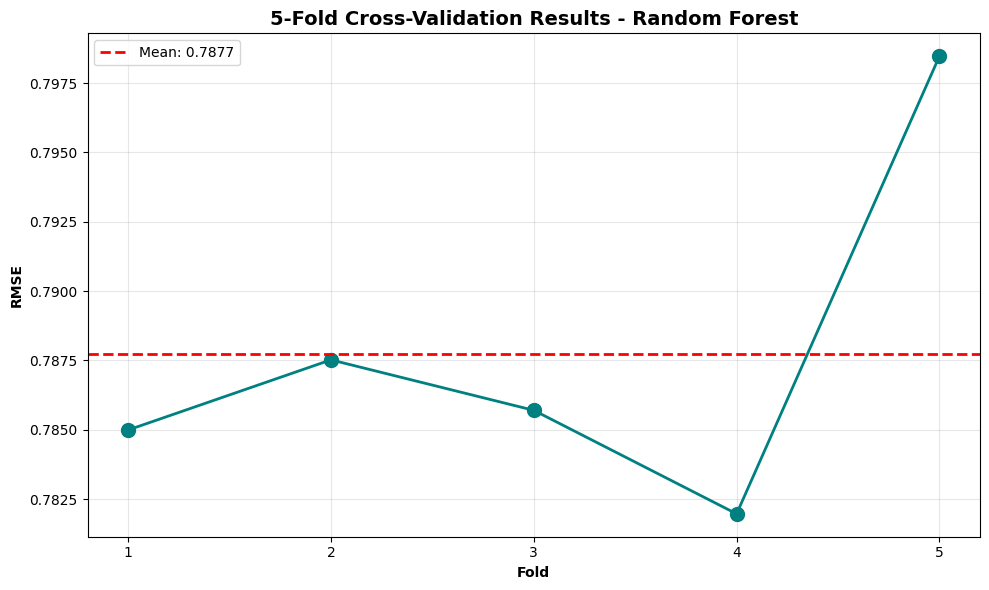

In [16]:
# ============================================================================
# CELL 16: Cross-Validation for Best Model
# ============================================================================
"""
Perform cross-validation on the best performing model
"""

from sklearn.model_selection import cross_val_score

print("\n" + "=" * 80)
print("CROSS-VALIDATION ANALYSIS")
print("=" * 80)

# Perform 5-fold cross-validation on Random Forest (best model)
print("\n⏳ Performing 5-fold cross-validation on Random Forest model...")

cv_scores_rf = cross_val_score(rf_model, X_train, y_train,
                                cv=5, scoring='neg_root_mean_squared_error',
                                n_jobs=-1)
cv_scores_rf = -cv_scores_rf  # Convert to positive RMSE

print(f"\n✓ Cross-Validation Results (Random Forest):")
print(f"   Fold 1 RMSE: {cv_scores_rf[0]:.4f}")
print(f"   Fold 2 RMSE: {cv_scores_rf[1]:.4f}")
print(f"   Fold 3 RMSE: {cv_scores_rf[2]:.4f}")
print(f"   Fold 4 RMSE: {cv_scores_rf[3]:.4f}")
print(f"   Fold 5 RMSE: {cv_scores_rf[4]:.4f}")
print(f"\n   Mean RMSE: {cv_scores_rf.mean():.4f}")
print(f"   Std RMSE: {cv_scores_rf.std():.4f}")

# Visualize CV scores
plt.figure(figsize=(10, 6))
plt.plot(range(1, 6), cv_scores_rf, marker='o', linewidth=2, markersize=10, color='teal')
plt.axhline(y=cv_scores_rf.mean(), color='r', linestyle='--', linewidth=2, label=f'Mean: {cv_scores_rf.mean():.4f}')
plt.xlabel('Fold', fontweight='bold')
plt.ylabel('RMSE', fontweight='bold')
plt.title('5-Fold Cross-Validation Results - Random Forest', fontsize=14, fontweight='bold')
plt.xticks(range(1, 6))
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


In [17]:
# ============================================================================
# CELL 17: Error Analysis by Rating Range
# ============================================================================
"""
Analyze model performance across different rating ranges
"""

print("=" * 80)
print("ERROR ANALYSIS BY RATING RANGE")
print("=" * 80)

# Create rating bins
rating_bins = [0, 2, 3, 4, 5]
rating_labels = ['0-2', '2-3', '3-4', '4-5']

test_data_analysis = test_data.copy()
test_data_analysis['predicted_rating'] = y_pred_rf
test_data_analysis['rating_range'] = pd.cut(test_data_analysis['rating'],
                                             bins=rating_bins,
                                             labels=rating_labels)

# Calculate metrics by rating range
print("\nPerformance Metrics by Rating Range:")
print(f"{'='*80}")

for label in rating_labels:
    subset = test_data_analysis[test_data_analysis['rating_range'] == label]
    if len(subset) > 0:
        rmse = np.sqrt(mean_squared_error(subset['rating'], subset['predicted_rating']))
        mae = mean_absolute_error(subset['rating'], subset['predicted_rating'])
        print(f"\nRating Range {label}:")
        print(f"   Sample Size: {len(subset)}")
        print(f"   RMSE: {rmse:.4f}")
        print(f"   MAE: {mae:.4f}")


ERROR ANALYSIS BY RATING RANGE

Performance Metrics by Rating Range:

Rating Range 0-2:
   Sample Size: 2770
   RMSE: 1.3807
   MAE: 1.1335

Rating Range 2-3:
   Sample Size: 5059
   RMSE: 0.6248
   MAE: 0.4986

Rating Range 3-4:
   Sample Size: 7959
   RMSE: 0.4887
   MAE: 0.3713

Rating Range 4-5:
   Sample Size: 4380
   RMSE: 0.9028
   MAE: 0.7651


In [18]:
# ============================================================================
# CELL 18: Top Movies Analysis
# ============================================================================
"""
Analyze the most rated and highest rated movies
"""

print("\n" + "=" * 80)
print("TOP MOVIES ANALYSIS")
print("=" * 80)

# Most rated movies
most_rated = ratings.groupby('movieId').agg({
    'rating': ['count', 'mean']
}).reset_index()
most_rated.columns = ['movieId', 'rating_count', 'avg_rating']
most_rated = most_rated.merge(movies, on='movieId')
most_rated = most_rated.sort_values('rating_count', ascending=False)

print("\nTop 10 Most Rated Movies:")
print(f"{'='*80}")
print(most_rated[['title', 'genres', 'rating_count', 'avg_rating']].head(10).to_string(index=False))

# Highest rated movies (with minimum 50 ratings)
highest_rated = most_rated[most_rated['rating_count'] >= 50].sort_values('avg_rating', ascending=False)

print("\n" + "=" * 80)
print("Top 10 Highest Rated Movies (min 50 ratings):")
print("=" * 80)
highest_rated['avg_rating'] = highest_rated['avg_rating'].round(2)
print(highest_rated[['title', 'genres', 'rating_count', 'avg_rating']].head(10).to_string(index=False))



TOP MOVIES ANALYSIS

Top 10 Most Rated Movies:
                                    title                           genres  rating_count  avg_rating
                      Forrest Gump (1994)         Comedy|Drama|Romance|War           329    4.164134
         Shawshank Redemption, The (1994)                      Crime|Drama           317    4.429022
                      Pulp Fiction (1994)      Comedy|Crime|Drama|Thriller           307    4.197068
         Silence of the Lambs, The (1991)            Crime|Horror|Thriller           279    4.161290
                       Matrix, The (1999)           Action|Sci-Fi|Thriller           278    4.192446
Star Wars: Episode IV - A New Hope (1977)          Action|Adventure|Sci-Fi           251    4.231076
                     Jurassic Park (1993) Action|Adventure|Sci-Fi|Thriller           238    3.750000
                        Braveheart (1995)                 Action|Drama|War           237    4.031646
        Terminator 2: Judgment Day (1991)  


GENRE ANALYSIS

Genre Statistics:
             genre  count  avg_rating  std_rating
         Film-Noir    870       3.920       0.887
               War   4859       3.808       0.979
       Documentary   1219       3.798       0.820
             Crime  16681       3.658       0.995
             Drama  41928       3.656       0.979
           Mystery   7674       3.632       1.006
         Animation   6988       3.630       0.970
              IMAX   4145       3.618       0.988
           Western   1930       3.584       1.012
           Musical   4138       3.564       0.989
         Adventure  24161       3.509       1.029
           Romance  18124       3.507       1.023
          Thriller  26452       3.494       1.025
           Fantasy  11834       3.491       1.039
(no genres listed)     47       3.489       1.218
            Sci-Fi  17243       3.456       1.071
            Action  30635       3.448       1.051
          Children   9208       3.413       1.056
            Com

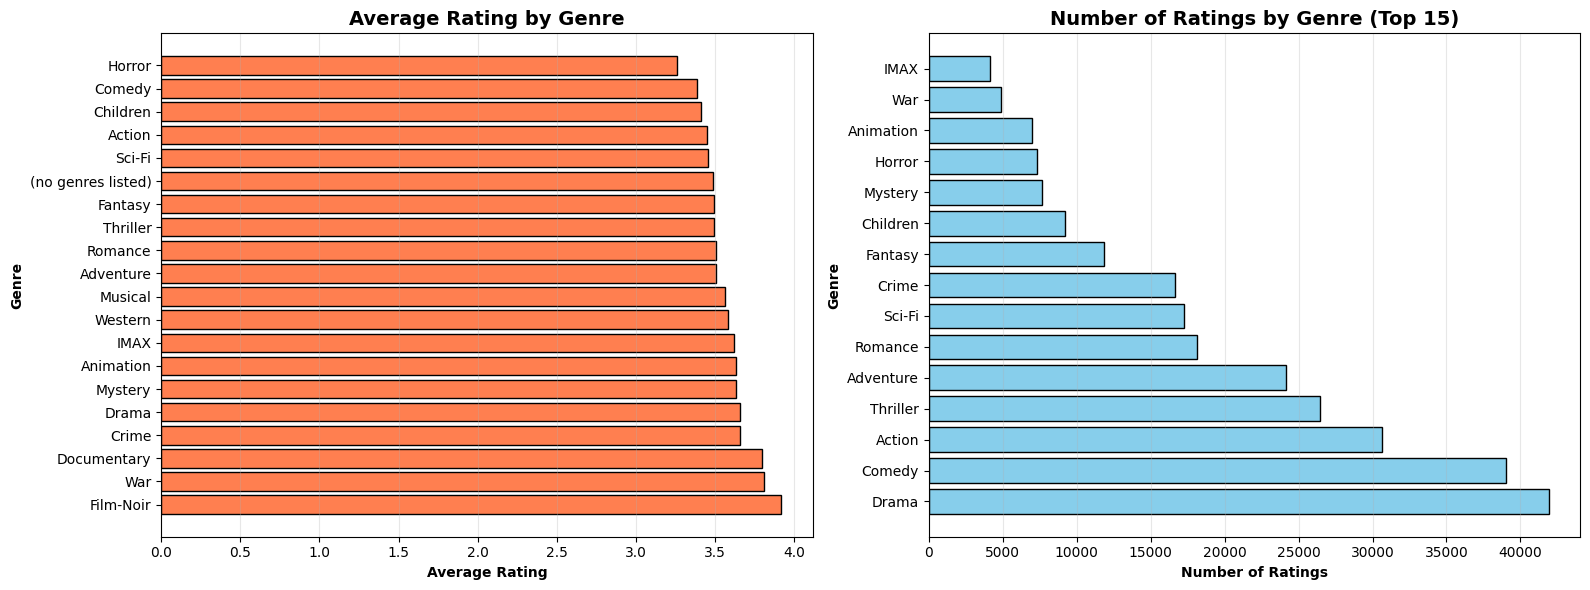

In [19]:
# ============================================================================
# CELL 19: Genre Analysis
# ============================================================================
"""
Analyze ratings distribution across different genres
"""

print("\n" + "=" * 80)
print("GENRE ANALYSIS")
print("=" * 80)

# Split genres and create genre-rating pairs
ratings_with_genres = ratings.merge(movies, on='movieId')
genre_ratings = []

for _, row in ratings_with_genres.iterrows():
    genres = row['genres'].split('|')
    for genre in genres:
        genre_ratings.append({
            'genre': genre,
            'rating': row['rating']
        })

genre_df = pd.DataFrame(genre_ratings)

# Calculate average rating by genre
genre_stats = genre_df.groupby('genre').agg({
    'rating': ['count', 'mean', 'std']
}).reset_index()
genre_stats.columns = ['genre', 'count', 'avg_rating', 'std_rating']
genre_stats = genre_stats.sort_values('avg_rating', ascending=False)

print("\nGenre Statistics:")
print(f"{'='*80}")
genre_stats['avg_rating'] = genre_stats['avg_rating'].round(3)
genre_stats['std_rating'] = genre_stats['std_rating'].round(3)
print(genre_stats.to_string(index=False))

# Visualize genre analysis
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Average rating by genre
axes[0].barh(genre_stats['genre'], genre_stats['avg_rating'], color='coral', edgecolor='black')
axes[0].set_xlabel('Average Rating', fontweight='bold')
axes[0].set_ylabel('Genre', fontweight='bold')
axes[0].set_title('Average Rating by Genre', fontsize=14, fontweight='bold')
axes[0].grid(axis='x', alpha=0.3)

# Number of ratings by genre
genre_counts = genre_stats.sort_values('count', ascending=False).head(15)
axes[1].barh(genre_counts['genre'], genre_counts['count'], color='skyblue', edgecolor='black')
axes[1].set_xlabel('Number of Ratings', fontweight='bold')
axes[1].set_ylabel('Genre', fontweight='bold')
axes[1].set_title('Number of Ratings by Genre (Top 15)', fontsize=14, fontweight='bold')
axes[1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()


In [20]:
# ============================================================================
# CELL 20: Final Summary Report
# ============================================================================
"""
Generate comprehensive final summary report
"""

print("\n" + "=" * 100)
print(" " * 35 + "FINAL SUMMARY REPORT")
print("=" * 100)

print("\n📊 DATASET OVERVIEW:")
print(f"   • Total Ratings: {len(ratings):,}")
print(f"   • Unique Users: {ratings['userId'].nunique():,}")
print(f"   • Unique Movies: {ratings['movieId'].nunique():,}")
print(f"   • Average Rating: {ratings['rating'].mean():.2f}")
print(f"   • Matrix Sparsity: {sparsity:.2f}%")

print("\n🔬 MODELS EVALUATED:")
print("   1. User-Based Collaborative Filtering")
print("   2. Matrix Factorization (SVD)")
print("   3. Linear Regression")
print("   4. Ridge Regression")
print("   5. Random Forest Regressor")

print("\n🏆 MODEL PERFORMANCE COMPARISON:")
print("=" * 100)
print(f"{'Model':<30} {'RMSE':<15} {'MAE':<15} {'R² Score':<15}")
print("=" * 100)
for _, row in results.iterrows():
    print(f"{row['Model']:<30} {row['RMSE']:<15.4f} {row['MAE']:<15.4f} {row['R² Score']:<15.4f}")
print("=" * 100)

print(f"\n🌟 BEST MODEL: {best_model_name}")
print(f"   • RMSE: {results.loc[best_model_idx, 'RMSE']:.4f}")
print(f"   • MAE: {results.loc[best_model_idx, 'MAE']:.4f}")
print(f"   • R² Score: {results.loc[best_model_idx, 'R² Score']:.4f}")

print("\n💡 KEY INSIGHTS:")
print(f"   • Most important features for prediction:")
for i, row in feature_importance.head(3).iterrows():
    print(f"     - {row['feature']}: {row['importance']:.4f}")

print(f"\n   • Most rated movie: {most_rated.iloc[0]['title']} ({most_rated.iloc[0]['rating_count']} ratings)")
print(f"   • Highest rated movie (50+ ratings): {highest_rated.iloc[0]['title']} (avg: {highest_rated.iloc[0]['avg_rating']:.2f})")
print(f"   • Most popular genre: {genre_counts.iloc[0]['genre']} ({genre_counts.iloc[0]['count']:,} ratings)")

print("\n✅ PROJECT COMPLETION STATUS:")
print("   ✓ Data loaded and preprocessed")
print("   ✓ Exploratory data analysis completed")
print("   ✓ Feature engineering performed")
print("   ✓ Multiple models trained and evaluated")
print("   ✓ Model comparison and selection completed")
print("   ✓ Recommendation system implemented")
print("   ✓ Comprehensive evaluation metrics calculated")

print("\n" + "=" * 100)
print("🎉 Movie Rating Prediction Project Completed Successfully!")
print("=" * 100)



                                   FINAL SUMMARY REPORT

📊 DATASET OVERVIEW:
   • Total Ratings: 100,836
   • Unique Users: 610
   • Unique Movies: 9,724
   • Average Rating: 3.50
   • Matrix Sparsity: 98.30%

🔬 MODELS EVALUATED:
   1. User-Based Collaborative Filtering
   2. Matrix Factorization (SVD)
   3. Linear Regression
   4. Ridge Regression
   5. Random Forest Regressor

🏆 MODEL PERFORMANCE COMPARISON:
Model                          RMSE            MAE             R² Score       
User-Based CF                  0.9423          0.7099          0.1858         
SVD                            2.8584          2.6325          -6.4913        
Linear Regression              0.8109          0.6159          0.4022         
Ridge Regression               0.8109          0.6159          0.4022         
Random Forest                  0.7944          0.5934          0.4264         

🌟 BEST MODEL: Random Forest
   • RMSE: 0.7944
   • MAE: 0.5934
   • R² Score: 0.4264

💡 KEY INSIGHTS:
   • Mos

In [21]:
# ============================================================================
# CELL 21: Save Results (Optional)
# ============================================================================
"""
Save the results and model comparison to CSV files
"""

print("\n" + "=" * 80)
print("SAVING RESULTS")
print("=" * 80)

# Save model comparison results
results.to_csv('model_comparison_results.csv', index=False)
print("\n✓ Model comparison saved to: model_comparison_results.csv")

# Save genre statistics
genre_stats.to_csv('genre_statistics.csv', index=False)
print("✓ Genre statistics saved to: genre_statistics.csv")

# Save top movies
most_rated.head(50).to_csv('top_50_most_rated_movies.csv', index=False)
print("✓ Top 50 most rated movies saved to: top_50_most_rated_movies.csv")

# Save highest rated movies
highest_rated.head(50).to_csv('top_50_highest_rated_movies.csv', index=False)
print("✓ Top 50 highest rated movies saved to: top_50_highest_rated_movies.csv")

# Save sample predictions
sample_predictions = test_data.head(100).copy()
sample_predictions['predicted_rating_rf'] = rf_model.predict(X_test.head(100))
sample_predictions = sample_predictions.merge(movies, on='movieId', how='left')
sample_predictions[['userId', 'movieId', 'title', 'rating', 'predicted_rating_rf']].to_csv('sample_predictions.csv', index=False)
print("✓ Sample predictions saved to: sample_predictions.csv")

print("\n" + "=" * 80)
print("✅ All results saved successfully!")
print("=" * 80)


SAVING RESULTS

✓ Model comparison saved to: model_comparison_results.csv
✓ Genre statistics saved to: genre_statistics.csv
✓ Top 50 most rated movies saved to: top_50_most_rated_movies.csv
✓ Top 50 highest rated movies saved to: top_50_highest_rated_movies.csv
✓ Sample predictions saved to: sample_predictions.csv

✅ All results saved successfully!
